#### Assignment 1. Create graph using edgelist from edge_list.txt file from data folder. 

- Extract features from 1 recursive generations by using Rolx algorithm
- Run the Rolx algorithm and plot the graph that same nodes have same colour based on Rolx algorithm.

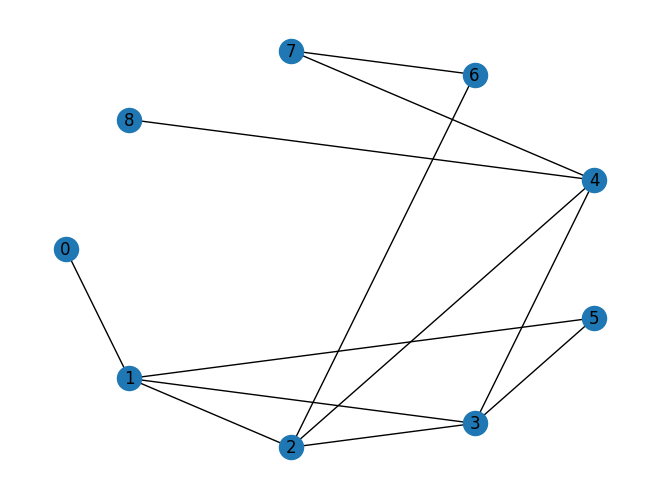

In [39]:
import networkx as nx
import networkx
import matplotlib.pyplot as plt

#  Undirected graph
G = nx.read_edgelist('./data/edge_list.txt')
nx.draw(G, pos=nx.shell_layout(G),with_labels = True)
#nx.draw(G, pos=nx.spiral_layout(G),with_labels = True)
# Directed graph
# G = nx.read_edgelist('edge_list.txt', create_using=nx.DiGraph())


#### Assignment 2. A undirected graph G with edge pairs as:
[(0, 1),(0, 2),(0, 3),(0, 5),(1, 3),(1, 6),(3, 4),(4, 5),(4, 7),(5, 8),(8, 9)].

a) Draw graph G. 

b) There are four nodes with the label 'A': 0,1,2,3. There are three nodes with the label 'B': 4,5,6.
By using Learning with Local and Global Consistency, finding the labels of nodes 7 and 8   .
    


In [40]:
G = nx.Graph()
# add node/edge pairs
G.add_edges_from([(0, 1),(0, 2),(0, 3),(0, 5),(1, 3),(1, 6),(3, 4),(4, 5),(4, 7),(5, 8),(8, 9)])

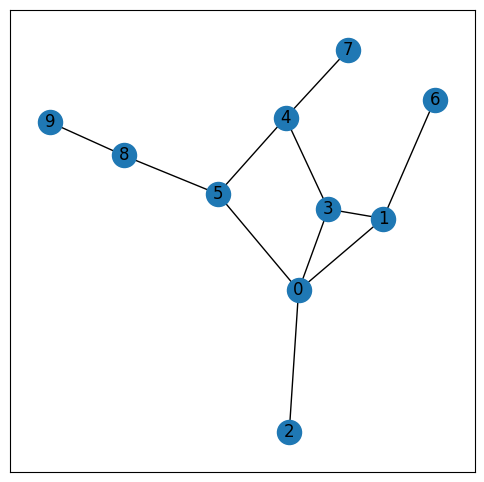

In [41]:
# draw the network G
plt.figure(figsize =(6, 6))
nx.draw_networkx(G, with_labels = True)

In [42]:
#Draw graphs with different labeled nodes
def draw_graph(G):
    clubs = []  # list to populate with labels
    for n in G.nodes:
        c = G.nodes[n]['label']
        col = 0
        if c=='A':
            clubs.append('green')
        elif c =='B':
            clubs.append('red')
        else:
            clubs.append('gray')
    pos = nx.spring_layout(G, seed=42) # To be able to recreate the graph layout
    nx.draw_networkx(G, pos=pos, node_color = clubs) # Plot the graph

In [43]:
# Filling labels for graph G
#There are four nodes with the label 'A': 0,1,2,3. There are three nodes with the label 'B': 4,5,6. 
#By using Learning with Local and Global Consistency, finding the labels of nodes 7 and 8 .

def fill_labels(G):
    for i in range(len(G.nodes)):
        if i <= 3:
            G.nodes[i]['label'] = 'A'
        else:
            G.nodes[i]['label'] = 'B'


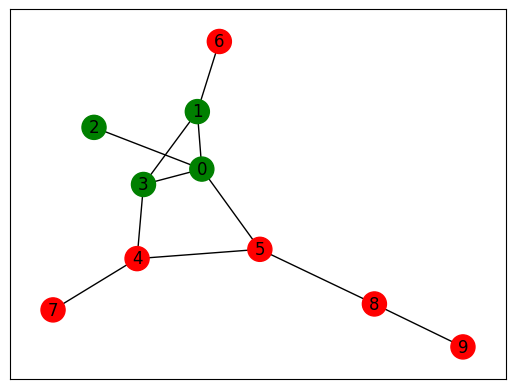

In [44]:
from networkx.algorithms import node_classification

mapping = {}
for i in G.nodes:
    mapping[i] = int(i)
#G = nx.relabel_nodes(G, mapping)

fill_labels(G)
#plt.show()
#nx.draw(G, with_labels=True)
draw_graph(G)

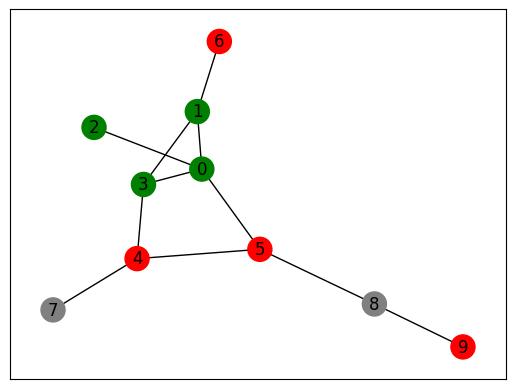

In [45]:
# Lets hide labels of nodes 7 and 8
unlabel_set = [7,8]
for n in unlabel_set:
   G.nodes[n]['label'] = ''
draw_graph(G)

In [46]:
predicted = node_classification.local_and_global_consistency(G)
predicted

['A', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'B', 'B']

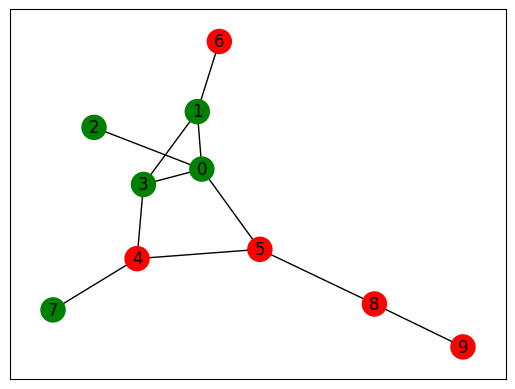

In [47]:
for i in range(len(G.nodes)):
    if G.nodes[i]['label']=='':
        G.nodes[i]['label']= predicted[i]
draw_graph(G)